## Loan Approval Pridiction - Model Building and Evaluation
This notebook covers training and evaluation of multiple classification models for loan approval prediction.

### Step 1: Import Libraries & Loan Data

In [15]:
# Import Required Libraries
import pandas as pd
import numpy as np
import joblib


# machine learning libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')


# Load Processed Data
X_train = pd.read_csv('../data/processed/X_train.csv')
X_test = pd.read_csv('../data/processed/X_test.csv')
y_train = pd.read_csv('../data/processed/y_train.csv')
y_test = pd.read_csv('../data/processed/y_test.csv')

### Step 2: Define Evaluation Function

In [16]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Precision:', precision_score(y_test, y_pred))
    print('Recall: ', recall_score(y_test, y_pred))
    print('F1 Score: ', f1_score(y_test, y_pred))
    print('\nConfusion Matrix: \n', confusion_matrix(y_test, y_pred))
    print('\nClassification Report: \n', classification_report(y_test, y_pred))

### Step 3: Train Models

In [17]:
# Logistic Regression

lr = LogisticRegression()
lr.fit(X_train, y_train)
print('Logistic Regression:')
evaluate_model(lr, X_test, y_test)

Logistic Regression:
Accuracy: 0.8407079646017699
Precision: 0.8191489361702128
Recall:  0.9871794871794872
F1 Score:  0.8953488372093024

Confusion Matrix: 
 [[18 17]
 [ 1 77]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.51      0.67        35
           1       0.82      0.99      0.90        78

    accuracy                           0.84       113
   macro avg       0.88      0.75      0.78       113
weighted avg       0.86      0.84      0.82       113



In [18]:
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
print('Random Forest')
evaluate_model(rf, X_test, y_test)

Random Forest
Accuracy: 0.831858407079646
Precision: 0.8314606741573034
Recall:  0.9487179487179487
F1 Score:  0.8862275449101796

Confusion Matrix: 
 [[20 15]
 [ 4 74]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.57      0.68        35
           1       0.83      0.95      0.89        78

    accuracy                           0.83       113
   macro avg       0.83      0.76      0.78       113
weighted avg       0.83      0.83      0.82       113



In [19]:
# XGBoost 
xgb = XGBClassifier(use_label_encoder = False, eval_metric = 'logloss', random_state=42)
xgb.fit(X_train, y_train)
print("XGBoost")
evaluate_model(xgb, X_test, y_test)

XGBoost
Accuracy: 0.8053097345132744
Precision: 0.8255813953488372
Recall:  0.9102564102564102
F1 Score:  0.8658536585365854

Confusion Matrix: 
 [[20 15]
 [ 7 71]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.57      0.65        35
           1       0.83      0.91      0.87        78

    accuracy                           0.81       113
   macro avg       0.78      0.74      0.76       113
weighted avg       0.80      0.81      0.80       113



In [129]:
from sklearn.tree import DecisionTreeClassifier

dc = DecisionTreeClassifier(random_state = 42)
dc.fit(X_train, y_train)
print('Decision Tree ')
evaluate_model(dc, X_test, y_test)

Decision Tree 
Accuracy: 0.7256637168141593
Precision: 0.821917808219178
Recall:  0.7692307692307693
F1 Score:  0.7947019867549668

Confusion Matrix: 
 [[22 13]
 [18 60]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.55      0.63      0.59        35
           1       0.82      0.77      0.79        78

    accuracy                           0.73       113
   macro avg       0.69      0.70      0.69       113
weighted avg       0.74      0.73      0.73       113



In [130]:
# KNeighborsClassifier()

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('KNeighbor classifier')
evaluate_model(knn, X_test, y_test)

KNeighbor classifier
Accuracy: 0.7345132743362832
Precision: 0.7666666666666667
Recall:  0.8846153846153846
F1 Score:  0.8214285714285714

Confusion Matrix: 
 [[14 21]
 [ 9 69]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.61      0.40      0.48        35
           1       0.77      0.88      0.82        78

    accuracy                           0.73       113
   macro avg       0.69      0.64      0.65       113
weighted avg       0.72      0.73      0.72       113



In [131]:
from sklearn.svm import SVC

sv = SVC()
sv.fit(X_train, y_train)
print('SVC')
evaluate_model(sv, X_test, y_test)

SVC
Accuracy: 0.6902654867256637
Precision: 0.6902654867256637
Recall:  1.0
F1 Score:  0.8167539267015707

Confusion Matrix: 
 [[ 0 35]
 [ 0 78]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        35
           1       0.69      1.00      0.82        78

    accuracy                           0.69       113
   macro avg       0.35      0.50      0.41       113
weighted avg       0.48      0.69      0.56       113



### Step 4: Hyperparameter Tuning for XGBoost


In [20]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate' : [0.01, 0.1],
    'subsample': [0.8, 1]
}

grid_xgb = GridSearchCV(XGBClassifier(use_label_encoder = False, eval_metric = 'logloss'),
                        param_grid, cv=3, scoring='f1', verbose=1, n_jobs=-1)
grid_xgb.fit(X_train, y_train)
print("Best Parameters: ", grid_xgb.best_params_)

# Evaluate the best model
best_xgb = grid_xgb.best_estimator_
print('Tuned XGBoost:')
evaluate_model(best_xgb, X_test, y_test)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Parameters:  {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
Tuned XGBoost:
Accuracy: 0.8407079646017699
Precision: 0.8260869565217391
Recall:  0.9743589743589743
F1 Score:  0.8941176470588236

Confusion Matrix: 
 [[19 16]
 [ 2 76]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.54      0.68        35
           1       0.83      0.97      0.89        78

    accuracy                           0.84       113
   macro avg       0.87      0.76      0.79       113
weighted avg       0.85      0.84      0.83       113



### Step 5: Save Best Model

In [21]:
joblib.dump(best_xgb, '../models/best_model.pkl')
print('Best model saved successfully!')

Best model saved successfully!


### Step 6: Adjusting Decision Threshold to Optimize Precision


In [23]:
y_proba = best_xgb.predict_proba(X_test)[:, 1]

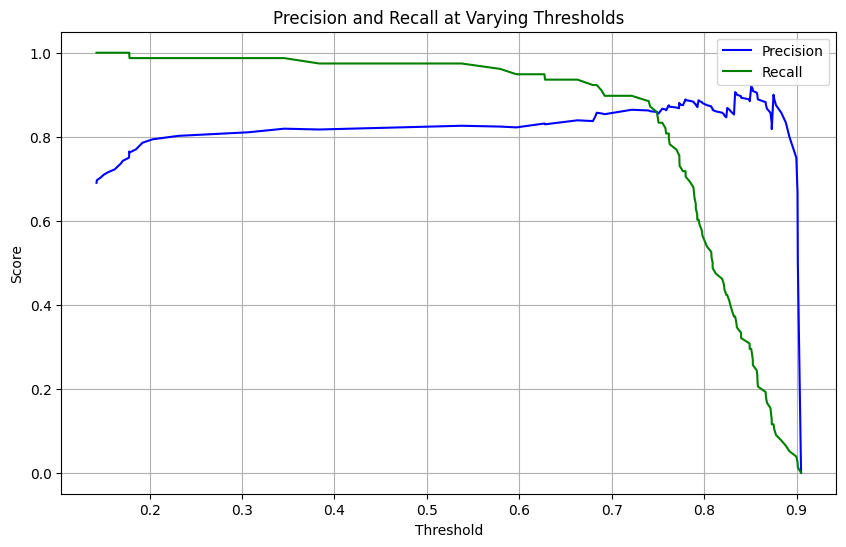

In [79]:
#Step 2 : Evaluate Precision at Different Thresholds

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np

#Get predicted probabilities for the positive class
y_probs = best_xgb.predict_proba(X_test)[:,1]
                     
# Compute precision-recall pairs for differenct thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

# Plot precision-recall vs threshold
plt.figure(figsize=(10,6))
plt.plot(thresholds, precision[:-1], label='Precision', color='blue')
plt.plot(thresholds, recall[:-1], label='Recall', color='green')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall at Varying Thresholds')
plt.legend()
plt.grid()
plt.show()

In [26]:
# Pick a customer threshold (you can tune this based on the curve)
optimal_threshold = 0.72

array([0.69026549, 0.69642857, 0.7027027 , 0.70909091, 0.71559633,
       0.72222222, 0.72897196, 0.73584906, 0.74285714, 0.75      ,
       0.75728155, 0.76470588, 0.76237624, 0.77      , 0.78571429,
       0.79381443, 0.80208333, 0.81052632, 0.81914894, 0.8172043 ,
       0.82608696, 0.82417582, 0.82222222, 0.83146067, 0.82954545,
       0.83908046, 0.8372093 , 0.84705882, 0.85714286, 0.85542169,
       0.85365854, 0.86419753, 0.8625    , 0.86075949, 0.85897436,
       0.85714286, 0.85526316, 0.86666667, 0.86486486, 0.8630137 ,
       0.875     , 0.87323944, 0.87142857, 0.86956522, 0.86764706,
       0.88059701, 0.87878788, 0.87692308, 0.875     , 0.88888889,
       0.88709677, 0.8852459 , 0.88333333, 0.88135593, 0.87931034,
       0.87719298, 0.875     , 0.87272727, 0.87037037, 0.88679245,
       0.88461538, 0.88235294, 0.88      , 0.87755102, 0.875     ,
       0.87234043, 0.86956522, 0.86666667, 0.86363636, 0.86046512,
       0.85714286, 0.85365854, 0.85      , 0.84615385, 0.86842

In [103]:
# Step 3: Choose a Higher Threshold for Better Precision
optimal_threshold = 0.72

# Apply threshold
y_pred_custom = (y_probs >= optimal_threshold).astype(int)

# Evaluate with new threshold
print('Evaluation at Optimal Threshold (', optimal_threshold,')')
print('Accuracy: ', accuracy_score(y_test, y_pred_custom))
print('Recall: ', recall_score(y_test, y_pred_custom))
print('Precision: ', precision_score(y_test, y_pred_custom))
print('F1 Score: ', f1_score(y_test, y_pred_custom))

Evaluation at Optimal Threshold ( 0.72 )
Accuracy:  0.831858407079646
Recall:  0.8974358974358975
Precision:  0.8641975308641975
F1 Score:  0.8805031446540881


In [106]:
# Save the optimal threshold as a float or in a dictionary
joblib.dump(optimal_threshold, '../models/optimal_threshold.pkl')

['../models/optimal_threshold.pkl']

In [29]:
for p, r, t in zip(precision, recall, thresholds):
    if p >= 0.90:
        print(f'Threshold: {t:.2f} | Precision: {p:.2f} | Recall: {r:.2f}')
        break

Threshold: 0.83 | Precision: 0.91 | Recall: 0.37


In [132]:
# Make final predictions with new thresholds
optimal_threshold = 0.72
y_pred_adjusted = (y_proba >= optimal_threshold).astype(int)

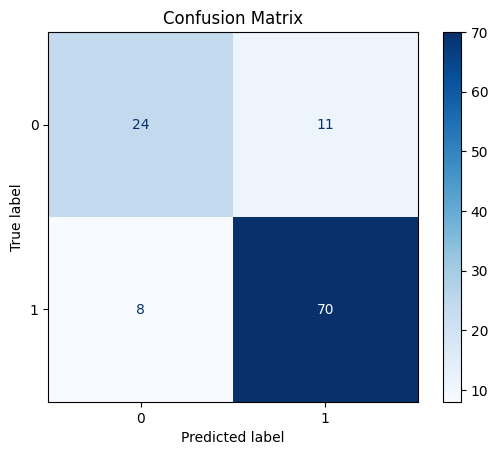

In [137]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_adjusted)

from sklearn.metrics import ConfusionMatrixDisplay
#Display it visually
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=[0,1])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


In [134]:
print('Accurary:', accuracy_score(y_test, y_pred_adjusted))
print('Precision:', precision_score(y_test, y_pred_adjusted))
print('Recall: ', recall_score(y_test, y_pred_adjusted))
print('f1 score: ', f1_score(y_test , y_pred_adjusted))

Accurary: 0.831858407079646
Precision: 0.8641975308641975
Recall:  0.8974358974358975
f1 score:  0.8805031446540881


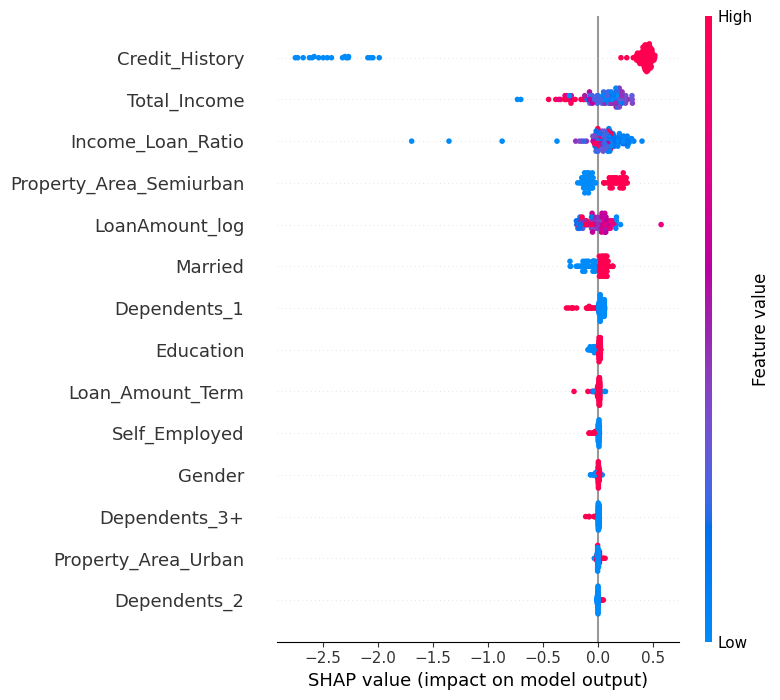

In [105]:
import shap 
explainer = shap.Explainer(best_xgb)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)

In [138]:
X_train.columns

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'Loan_Amount_Term',
       'Credit_History', 'Total_Income', 'Income_Loan_Ratio', 'LoanAmount_log',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Dependents_1',
       'Dependents_2', 'Dependents_3+'],
      dtype='object')

In [140]:
X_train.head()

,Gender,Married,Education,Self_Employed,Loan_Amount_Term,Credit_History,Total_Income,Income_Loan_Ratio,LoanAmount_log,Property_Area_Semiurban,Property_Area_Urban,Dependents_1,Dependents_2,Dependents_3+
0,1,0,0,0,360.0,1.0,-1.857759,-0.212873,-2.870398,False,True,False,False,False
1,1,0,1,0,360.0,1.0,-1.291850,-0.321202,-1.274892,True,False,False,False,False
2,1,1,1,0,360.0,0.0,0.054624,0.113880,-0.053476,False,False,False,False,False
3,0,1,1,1,360.0,0.0,2.602990,-0.258107,1.964925,False,True,True,False,False
4,1,1,1,0,360.0,0.0,1.405089,-0.536995,1.727762,False,True,False,True,False


In [141]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451 entries, 0 to 450
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   451 non-null    int64  
 1   Married                  451 non-null    int64  
 2   Education                451 non-null    int64  
 3   Self_Employed            451 non-null    int64  
 4   Loan_Amount_Term         451 non-null    float64
 5   Credit_History           451 non-null    float64
 6   Total_Income             451 non-null    float64
 7   Income_Loan_Ratio        451 non-null    float64
 8   LoanAmount_log           451 non-null    float64
 9   Property_Area_Semiurban  451 non-null    bool   
 10  Property_Area_Urban      451 non-null    bool   
 11  Dependents_1             451 non-null    bool   
 12  Dependents_2             451 non-null    bool   
 13  Dependents_3+            451 non-null    bool   
dtypes: bool(5), float64(5), in